In [ ]:
!git clone https://github.com/conwerner/ocr-transformer.git
!pip install -r /content/ocr-transformer/requirements.txt

## Download data from kaggle

note: you need to have your token ```kaggle.json```

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download constantinwerner/cyrillic-handwriting-dataset
!unzip /content/cyrillic-handwriting-dataset.zip

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Train & Test

In [ ]:
!python /content/ocr-transformer/train.py

In [12]:
!python /content/ocr-transformer/test.py

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1436: UserWarning: The parameter 'fillcolor' is deprecated since 0.12 and will be removed in 0.14. Please use 'fill' instead.
  "The parameter 'fillcolor' is deprecated since 0.12 and will be removed in 0.14. "
100% 1544/1544 [00:02<00:00, 750.61it/s]
transformer layers: 2
transformer heads: 4
hidden dim: 512
num classes: 92
backbone: conv(64)->conv(64)->conv(128)->conv(256)->conv(256)->conv(512)->conv(512)
dropout: 0.0
19,838,174 trainable parameters
loading weights from /content/drive/MyDrive/ocr_transformer_4h2l_simple_conv_64x256.pt
PUNCT: False, CASE: False
{'loss': 0.420012213755399, 'wer': 0.37890625, 'cer': 0.09080591936556459}


## Predict

Predictions are saved in the file ```predictions.tsv```:

```
filename	prediction
test1318.png	информацию можн
test761.png	описани
testt692.png	одну бысл
test567.png	чт
test498.png	хоти
test635.png	функци
test385.png	инграционно
test1520.png	по територи
test418.png	кредий н
test1013.png	в ситуаци
test1199.png	Заявлени
```

In [66]:
!python /content/ocr-transformer/predict.py

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1436: UserWarning: The parameter 'fillcolor' is deprecated since 0.12 and will be removed in 0.14. Please use 'fill' instead.
  "The parameter 'fillcolor' is deprecated since 0.12 and will be removed in 0.14. "
transformer layers: 2
transformer heads: 4
hidden dim: 512
num classes: 92
backbone: conv(64)->conv(64)->conv(128)->conv(256)->conv(256)->conv(512)->conv(512)
dropout: 0.0
19,838,174 trainable parameters
loading weights from /content/drive/MyDrive/ocr_transformer_4h2l_simple_conv_64x256.pt
predictions are saved in /content/predictions.tsv


let us have a look at pictures:

In [67]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

def show_img_grid(images, labels, N):
    n = int(N**(0.5))
    k = 0
    f, axarr = plt.subplots(n,n,figsize=(10,10))
    for i in range(n):
        for j in range(n):
            axarr[i,j].set_title(labels[k])
            axarr[i,j].imshow(images[k])
            k += 1

df = pd.read_csv("/content/predictions.tsv", sep='\t', quoting=3)
df.head()

,filename,prediction
0,test1318.png,информацию можно
1,test761.png,описание
2,testt692.png,одну быслу
3,test567.png,что
4,test498.png,хотим


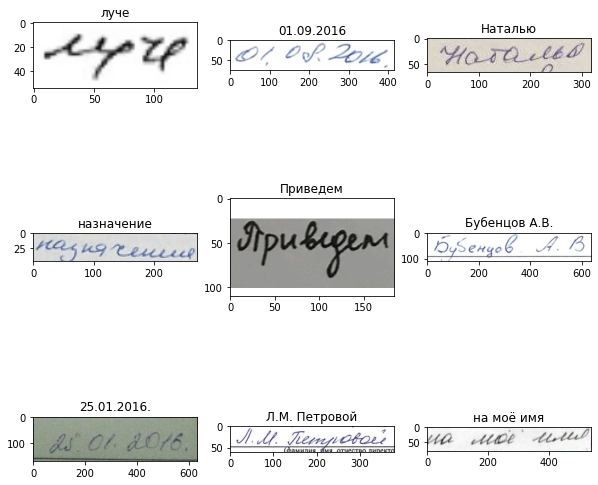

In [68]:
N = 9
images = []
labels = []
for i in range(N):
  idx = random.randint(0, len(df))
  image_path = '/content/test/' + df.iloc[idx]['filename']
  predicted_label = df.iloc[idx]['prediction']

  images.append(Image.open(image_path))
  labels.append(predicted_label)

show_img_grid(images, labels, N)